<a href="https://colab.research.google.com/github/poku0857643/Cancer-classification/blob/main/pseudo-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cancer Classification**

In [ ]:
#pseodo code of cancer classification overall pipeline
1. Start

2. function data_preprocessing (input: raw data)
-read
-handle missing value
-normalization data
-train test split
-return processed_train_data, precessed_test_data

3. function feature_selection (input: processed_train_data, processed_train_data_labels)
-feature selection method
-select the top features based on the method's criteria
-return selected_feature

4. function RF_model(input: train_data_with_selected_features, train_labels)
-create a OneVsRestClassifier using RandomForestClassifer
-train the model with train_data_with_selected_features and train_labels
-retunr: trained_RF_model

5. Function performance_evaluation(input: trained_mdoel, test_data, test_labels)
-use trained_model to predict on test_data
-calculate accuracy, precision, recall and f1-score
-generate a classification report
-print all evaluation metrics
-return evaluation_metrics

6. Function generate_cm_dataframe(input:y_true, y_pred, labels):
-call confusion matrix using y_true and y_pred
-display confusion matrix on dataframe
-return cm_df

7. Function plot_confusion)matrix(cm_df):
-plot confusion matrix using seaborn heatmap


8. Function plot_multiclass_roc(y_test, pred_prob, classed, labels):
-calculate FPR, TPR, threshold, ROC-AUC
-plot FPR, TPR, threshold, ROC

9. Main
-raw_data = laod cancer data
-train_data, test_data = data_preprocessing(raw_data)
-selected_features = feature_selection(train_data, train_labels)
-trained_RF = RF_model(train_data[selected_features], train_labels)
-performance_evaluation(trained_RF, test_data[selected_features], test_labels)
-generate_cm_dataframe(y_test, y_pred, labels)
-plot_cm_dataframe(cm_df)
-plot ROC, threshold, FPR, TPR

In [ ]:
def data_preprocessing(self)


Download library

In [ ]:
#data handling
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

#performance metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

Dataset preparation

In [ ]:
file_url = 'http://github.com/Cancer-classification/raw/main/cancer_gene_expression.zip'
dataframe =pd.read_csv(file_url)
x = dataframe.iloc[:,0:-1]
y = dataframe.iloc[:,-1]
#encode labels
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)
#data splitting
x_train,x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.2,random_state=42)
#scale data beteeen 0 nad 1
min_max_scaler=MinMaxScaler()
x_train_norm=min_max_scaler.fit_transform(x_train)
x_test_norm=min_max_scaler.fit_transform(x_test)
x_train.iloc[0,3]
x_train_norm[0,3]
#feature selection
MI=mutual_info_classif(x_train_norm, y_train)
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]
x_train_selected=x_train_norm[:, selected_scores_indices]
x_test_selected=x_test_norm[:,selected_scores_indices]

In [ ]:
file_url = 'http://github.com/poku0857643/Cancer-classification/raw/main/cancer_gene_expression.zip'


In [ ]:
dataframe =pd.read_csv(file_url)
dataframe

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.000000,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.000000,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.000000,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.000000,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.000000,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,2.933384,0.0,1.683921,0.0,0.0,0.0,0.0,0.635336,1.252839,...,9.985842,9.469967,4.225275,6.955336,11.722206,7.309940,10.986119,6.396848,1.252839,BRCA
797,0.0,0.000000,0.0,2.772625,0.0,0.0,0.0,0.0,0.534759,3.761764,...,12.334681,8.157327,1.482797,6.758183,11.403838,9.005347,11.012045,5.386625,1.697640,COAD
798,0.0,0.408277,0.0,1.854754,0.0,0.0,0.0,0.0,0.000000,0.986520,...,11.671992,8.859616,6.393828,6.427115,11.596586,7.454127,10.718533,5.507417,1.398131,BRCA
799,0.0,0.639232,0.0,3.226971,0.0,0.0,0.0,0.0,1.921322,0.639232,...,12.237087,5.753976,4.192478,6.614875,11.183245,7.544261,10.649382,5.282158,0.639232,BRCA


In [ ]:
#data exploration and cleaning
print(dataframe.shape)

(801, 8001)


In [ ]:
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [ ]:
dataframe.columns[-1]

'Cancer_Type'

In [ ]:
datanul = dataframe.isnull().sum()
g=[i for i in datanul if i >0]
print('columns with missing value:%d'%len(g))

columns with missing value:0


In [ ]:
print(dataframe['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


<Axes: >

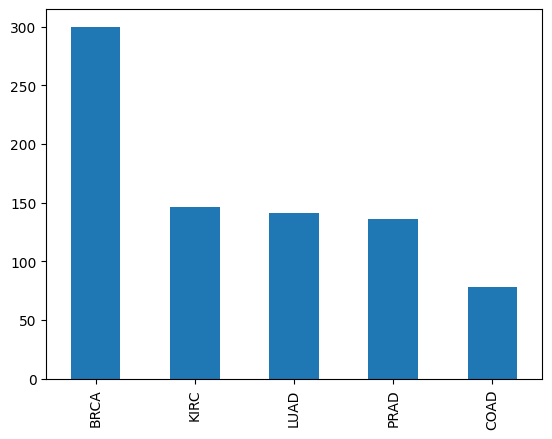

In [ ]:
dataframe['Cancer_Type'].value_counts().plot.bar()

In [ ]:
#data preprocessing
def data_preprocess(self)

In [ ]:
#data preprocessing
x = dataframe.iloc[:,0:-1]
y = dataframe.iloc[:,-1]

In [ ]:
x.shape

(801, 8000)

In [ ]:
y.shape

(801,)

In [ ]:
#encode labels
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
#data splitting
x_train,x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.2,random_state=42)

In [ ]:
#scale data beteeen 0 nad 1
min_max_scaler=MinMaxScaler()
x_train_norm=min_max_scaler.fit_transform(x_train)
x_test_norm=min_max_scaler.fit_transform(x_test)



In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
x_train.iloc[0,3]

2.18164326123

In [ ]:
x_train_norm[0,3]

0.4671305057022768

In [ ]:
#feature selection
MI=mutual_info_classif(x_train_norm, y_train)

In [ ]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [ ]:
x_train_selected=x_train_norm[:, selected_scores_indices]
x_test_selected=x_test_norm[:,selected_scores_indices]